In [35]:
# Import libraries
import pandas as pd
import pandas_ta as pta
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Load Binance csv data in dataframe
df = pd.read_csv("data/BTCUSDT_1d.csv")

In [37]:
df.shape

(500, 12)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   # openTime                500 non-null    int64  
 1   open                      500 non-null    float64
 2   high                      500 non-null    float64
 3   low                       500 non-null    float64
 4   close                     500 non-null    float64
 5   volume                    500 non-null    float64
 6   closeTime                 500 non-null    int64  
 7   qouteAssetVolume          500 non-null    float64
 8   numberOfTrades            500 non-null    int64  
 9   takerBuyBaseAssetVolume   500 non-null    float64
 10  takerBuyQuoteAssetVolume  500 non-null    float64
 11  ignore                    500 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 47.0 KB


In [39]:
df.size

6000

In [40]:
df.ndim

2

In [41]:
df['# openTime'] = pd.to_datetime(df["# openTime"], unit="ms")
df['closeTime'] = pd.to_datetime(df["closeTime"], unit="ms")
df

,# openTime,open,high,low,close,volume,closeTime,qouteAssetVolume,numberOfTrades,takerBuyBaseAssetVolume,takerBuyQuoteAssetVolume,ignore
0,2020-05-06,9021.36,9395.00,8906.21,9142.92,105925.302420,2020-05-06 23:59:59.999,9.727935e+08,1007661,51189.790893,4.701677e+08,0
1,2020-05-07,9143.40,10067.00,9021.00,9986.40,147154.611378,2020-05-07 23:59:59.999,1.409783e+09,1254835,74602.193112,7.154080e+08,0
2,2020-05-08,9986.30,10035.96,9705.00,9800.01,100683.796400,2020-05-08 23:59:59.999,9.970058e+08,967816,46207.637594,4.577013e+08,0
3,2020-05-09,9800.02,9914.25,9520.00,9539.40,81950.679567,2020-05-09 23:59:59.999,7.950014e+08,839384,36738.679244,3.564756e+08,0
4,2020-05-10,9539.10,9574.83,8117.00,8722.77,183865.182028,2020-05-10 23:59:59.999,1.594996e+09,1565771,84376.580774,7.314177e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,2021-09-13,46025.23,46880.00,43370.00,44940.73,65429.150560,2021-09-13 23:59:59.999,2.930668e+09,1703512,32041.059720,1.435587e+09,0
496,2021-09-14,44940.72,47250.00,44594.44,47111.52,44855.850990,2021-09-14 23:59:59.999,2.072260e+09,1210258,22182.466490,1.025157e+09,0
497,2021-09-15,47103.28,48500.00,46682.32,48121.41,43204.711740,2021-09-15 23:59:59.999,2.056996e+09,1176050,20903.535350,9.951983e+08,0
498,2021-09-16,48121.40,48557.00,47021.10,47737.82,40725.088950,2021-09-16 23:59:59.999,1.948447e+09,1176129,19907.791510,9.525030e+08,0


In [42]:
# Creating the indicators for buy and sell signals

# Hilo
highl = 13
lowl = 21
df["hilo"] = pta.hilo(high=df["high"],low=df["low"],close=df["close"],high_length=highl,low_length=lowl,mamode=None,offset=None,)[f"HILO_{highl}_{lowl}"]
df

,# openTime,open,high,low,close,volume,closeTime,qouteAssetVolume,numberOfTrades,takerBuyBaseAssetVolume,takerBuyQuoteAssetVolume,ignore,hilo
0,2020-05-06,9021.36,9395.00,8906.21,9142.92,105925.302420,2020-05-06 23:59:59.999,9.727935e+08,1007661,51189.790893,4.701677e+08,0,NaN
1,2020-05-07,9143.40,10067.00,9021.00,9986.40,147154.611378,2020-05-07 23:59:59.999,1.409783e+09,1254835,74602.193112,7.154080e+08,0,NaN
2,2020-05-08,9986.30,10035.96,9705.00,9800.01,100683.796400,2020-05-08 23:59:59.999,9.970058e+08,967816,46207.637594,4.577013e+08,0,NaN
3,2020-05-09,9800.02,9914.25,9520.00,9539.40,81950.679567,2020-05-09 23:59:59.999,7.950014e+08,839384,36738.679244,3.564756e+08,0,NaN
4,2020-05-10,9539.10,9574.83,8117.00,8722.77,183865.182028,2020-05-10 23:59:59.999,1.594996e+09,1565771,84376.580774,7.314177e+08,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2021-09-13,46025.23,46880.00,43370.00,44940.73,65429.150560,2021-09-13 23:59:59.999,2.930668e+09,1703512,32041.059720,1.435587e+09,0,49218.746923
496,2021-09-14,44940.72,47250.00,44594.44,47111.52,44855.850990,2021-09-14 23:59:59.999,2.072260e+09,1210258,22182.466490,1.025157e+09,0,49218.746923
497,2021-09-15,47103.28,48500.00,46682.32,48121.41,43204.711740,2021-09-15 23:59:59.999,2.056996e+09,1176050,20903.535350,9.951983e+08,0,49218.746923
498,2021-09-16,48121.40,48557.00,47021.10,47737.82,40725.088950,2021-09-16 23:59:59.999,1.948447e+09,1176129,19907.791510,9.525030e+08,0,49218.746923


In [43]:
# Determine buy signal Hilo
df['hilo_buy'] = (df['close'] > df['hilo'])
df[['# openTime','close','hilo','hilo_buy']].tail(50)

,# openTime,close,hilo,hilo_buy
450,2021-07-30,42206.37,33098.798095,True
451,2021-07-31,41461.83,33479.530000,True
452,2021-08-01,39845.44,33770.746190,True
453,2021-08-02,39147.82,34057.968095,True
454,2021-08-03,38207.05,34057.968095,True
455,2021-08-04,39723.18,34600.746190,True
456,2021-08-05,40862.46,34895.970000,True
457,2021-08-06,42836.87,35316.630000,True
458,2021-08-07,44572.54,35853.872857,True
459,2021-08-08,43794.37,36432.540952,True


In [44]:
# Determine Supertrend
length = 10
multiplier = 4.5
df['supertrend_buy'] = pta.supertrend(high=df['high'], low=df['low'], close=df['close'], length=length, multiplier=multiplier)[f'SUPERTd_{length}_{multiplier}']
df['supertrend'] = pta.supertrend(high=df['high'], low=df['low'], close=df['close'], length=length, multiplier=multiplier)[f'SUPERT_{length}_{multiplier}']
# df.drop(['supertrend'], axis = 1)
df.tail(15)

,# openTime,open,high,low,close,volume,closeTime,qouteAssetVolume,numberOfTrades,takerBuyBaseAssetVolume,takerBuyQuoteAssetVolume,ignore,hilo,hilo_buy,supertrend_buy,supertrend
485,2021-09-03,49246.63,51000.00,48316.84,49999.14,59025.644157,2021-09-03 23:59:59.999,2.949574e+09,1645163,29625.443383,1.481238e+09,0,46760.076190,True,1,39925.884685
486,2021-09-04,49998.00,50535.69,49370.00,49915.64,34664.659590,2021-09-04 23:59:59.999,1.733527e+09,1225830,16739.703850,8.372255e+08,0,46921.931905,True,1,40572.724345
487,2021-09-05,49917.54,51900.00,49450.00,51756.88,40544.835873,2021-09-05 23:59:59.999,2.049212e+09,1417660,21557.235864,1.090240e+09,0,47110.027143,True,1,41130.391411
488,2021-09-06,51756.88,52780.00,50969.33,52663.90,49249.667081,2021-09-06 23:59:59.999,2.549291e+09,1678015,24620.352525,1.274643e+09,0,47362.852381,True,1,42469.715769
489,2021-09-07,52666.20,52920.00,42843.05,46863.73,123048.802719,2021-09-07 23:59:59.999,6.004106e+09,3321711,57935.601976,2.832269e+09,0,50254.660000,False,1,42469.715769
490,2021-09-08,46868.57,47340.99,44412.02,46048.31,65069.315200,2021-09-08 23:59:59.999,3.000606e+09,1796101,31796.747600,1.466545e+09,0,50099.902308,False,1,42469.715769
491,2021-09-09,46048.31,47399.97,45513.08,46395.14,50651.660020,2021-09-09 23:59:59.999,2.351863e+09,1567586,24183.388030,1.122995e+09,0,49965.290000,False,1,42469.715769
492,2021-09-10,46395.14,47033.00,44132.29,44850.91,49048.266180,2021-09-10 23:59:59.999,2.243699e+09,1569941,24358.597990,1.114491e+09,0,49790.982308,False,1,42469.715769
493,2021-09-11,44842.20,45987.93,44722.22,45173.69,30440.408100,2021-09-11 23:59:59.999,1.380371e+09,1060890,14804.342600,6.711231e+08,0,49510.648462,False,1,42469.715769
494,2021-09-12,45173.68,46460.00,44742.06,46025.24,32094.280520,2021-09-12 23:59:59.999,1.464781e+09,1179808,15735.451040,7.184360e+08,0,49323.832308,False,1,42469.715769


In [45]:
# Determine MACD
fast = 12
slow = 26
smooth = 9
df['macd'] = pta.macd(close=df['close'], fast=fast, slow=slow, signal=smooth, offset=None)[f'MACD_{fast}_{slow}_{smooth}']
df['macds'] = pta.macd(close=df['close'], fast=fast, slow=slow, signal=smooth, offset=None)[f'MACDs_{fast}_{slow}_{smooth}']
df['macdh'] = pta.macd(close=df['close'], fast=fast, slow=slow, signal=smooth, offset=None)[f'MACDh_{fast}_{slow}_{smooth}']
df[['closeTime','close','macd','macds','macdh']].tail(50)

,closeTime,close,macd,macds,macdh
450,2021-07-30 23:59:59.999,42206.37,1600.102243,424.671178,1175.431065
451,2021-07-31 23:59:59.999,41461.83,1833.936464,706.524235,1127.412229
452,2021-08-01 23:59:59.999,39845.44,1867.297562,938.678901,928.618661
453,2021-08-02 23:59:59.999,39147.82,1816.504831,1114.244087,702.260744
454,2021-08-03 23:59:59.999,38207.05,1680.961867,1227.587643,453.374224
455,2021-08-04 23:59:59.999,39723.18,1676.555820,1317.381278,359.174542
456,2021-08-05 23:59:59.999,40862.46,1744.880474,1402.881117,341.999357
457,2021-08-06 23:59:59.999,42836.87,1936.029301,1509.510754,426.518547
458,2021-08-07 23:59:59.999,44572.54,2202.184771,1648.045558,554.139214
459,2021-08-08 23:59:59.999,43794.37,2323.538775,1783.144201,540.394574


In [46]:
# Create a function to signal when buy/sell signals arise
def buy_sell(df):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(df)):
    if (df['hilo_buy'][i] == True) & (df['supertrend_buy'][i] == 1):
#     if df['macd'][i] > df['macds'][i]:
      if flag != 1:
        sigPriceBuy.append(df['close'][i])
        sigPriceSell.append(np.NaN)
        flag = 1
      else:
        sigPriceBuy.append(np.NaN)
        sigPriceSell.append(np.NaN)
    elif df['macd'][i] < df['macds'][i]:
      if flag != 0:
        sigPriceBuy.append(np.NaN)
        sigPriceSell.append(df['close'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.NaN)
        sigPriceSell.append(np.NaN)
    else:
      sigPriceBuy.append(np.NaN)
      sigPriceSell.append(np.NaN)

  return(sigPriceBuy, sigPriceSell)

In [47]:
# Store the buy and sell data into a variable
buy_sell = buy_sell(df)
df['Buy_signal_price'] = buy_sell[0] # Kijk naar pos 0 in de output van de functie
df['Sell_signal_price'] = buy_sell[1] # Kijk naar pos 1 in de output van de functie

In [48]:
df[['closeTime','close','hilo_buy','supertrend_buy','Buy_signal_price','Sell_signal_price']].tail(60)

,closeTime,close,hilo_buy,supertrend_buy,Buy_signal_price,Sell_signal_price
440,2021-07-20 23:59:59.999,29790.35,False,-1,NaN,NaN
441,2021-07-21 23:59:59.999,32144.51,False,-1,NaN,NaN
442,2021-07-22 23:59:59.999,32287.83,False,-1,NaN,NaN
443,2021-07-23 23:59:59.999,33634.09,True,-1,NaN,NaN
444,2021-07-24 23:59:59.999,34258.14,True,-1,NaN,NaN
445,2021-07-25 23:59:59.999,35381.02,True,-1,NaN,NaN
446,2021-07-26 23:59:59.999,37237.60,True,-1,NaN,NaN
447,2021-07-27 23:59:59.999,39457.87,True,1,39457.87,NaN
448,2021-07-28 23:59:59.999,40019.56,True,1,NaN,NaN
449,2021-07-29 23:59:59.999,40016.48,True,1,NaN,NaN


In [49]:
df[['closeTime','close','hilo_buy','supertrend_buy','Buy_signal_price','Sell_signal_price']][df['Buy_signal_price']>0].tail(60)

,closeTime,close,hilo_buy,supertrend_buy,Buy_signal_price,Sell_signal_price
22,2020-05-28 23:59:59.999,9575.89,True,1,9575.89,NaN
47,2020-06-22 23:59:59.999,9685.69,True,1,9685.69,NaN
61,2020-07-06 23:59:59.999,9344.20,True,1,9344.20,NaN
118,2020-09-01 23:59:59.999,11921.97,True,1,11921.97,NaN
132,2020-09-15 23:59:59.999,10785.31,True,1,10785.31,NaN
272,2021-02-02 23:59:59.999,35466.24,True,1,35466.24,NaN
305,2021-03-07 23:59:59.999,50971.75,True,1,50971.75,NaN
327,2021-03-29 23:59:59.999,57635.47,True,1,57635.47,NaN
447,2021-07-27 23:59:59.999,39457.87,True,1,39457.87,NaN


In [50]:
df[['closeTime','close','hilo_buy','supertrend_buy','Buy_signal_price','Sell_signal_price']][df['Sell_signal_price']>0].tail(55).tail(60)

,closeTime,close,hilo_buy,supertrend_buy,Buy_signal_price,Sell_signal_price
44,2020-06-19 23:59:59.999,9310.23,False,1,NaN,9310.23
49,2020-06-24 23:59:59.999,9296.49,False,1,NaN,9296.49
111,2020-08-25 23:59:59.999,11318.42,False,1,NaN,11318.42
119,2020-09-02 23:59:59.999,11388.54,False,1,NaN,11388.54
260,2021-01-21 23:59:59.999,30850.13,False,1,NaN,30850.13
297,2021-02-27 23:59:59.999,46106.43,False,1,NaN,46106.43
322,2021-03-24 23:59:59.999,52303.65,False,1,NaN,52303.65
347,2021-04-18 23:59:59.999,56150.01,False,1,NaN,56150.01
489,2021-09-07 23:59:59.999,46863.73,False,1,NaN,46863.73


In aanvulling op de Hilo en Supertrend settings wil ik ook dat MACD eigenlijk ook positief is. 

In [51]:
df['macd_buy'] = df['macd'] > df['macds']
df[['closeTime','close','macd_buy','hilo','supertrend_buy','Buy_signal_price','Sell_signal_price']][df['macd_buy']==True].tail(15).tail(60)

,closeTime,close,macd_buy,hilo,supertrend_buy,Buy_signal_price,Sell_signal_price
457,2021-08-06 23:59:59.999,42836.87,True,35316.630000,1,NaN,NaN
458,2021-08-07 23:59:59.999,44572.54,True,35853.872857,1,NaN,NaN
459,2021-08-08 23:59:59.999,43794.37,True,36432.540952,1,NaN,NaN
460,2021-08-09 23:59:59.999,46253.40,True,37021.662857,1,NaN,NaN
461,2021-08-10 23:59:59.999,45584.99,True,37750.780000,1,NaN,NaN
462,2021-08-11 23:59:59.999,45511.00,True,38505.948095,1,NaN,NaN
463,2021-08-12 23:59:59.999,44399.00,True,39080.329048,1,NaN,NaN
464,2021-08-13 23:59:59.999,47800.00,True,39665.713333,1,NaN,NaN
465,2021-08-14 23:59:59.999,47068.51,True,40264.279524,1,NaN,NaN
466,2021-08-15 23:59:59.999,46973.82,True,40818.988095,1,NaN,NaN


In [59]:
# Create a function to signal when buy/sell signals arise
def buy_sell(df):
  sigPriceBuy = []
  sigPriceSell = []
  signal = []
  flag = -1

  for i in range(len(df)):
    # Buy Signal if MACD, Supertrend and hilo are true
#     if (df['macd_buy'][i] == True) & (df['hilo_buy'][i] == True) & (df['supertrend_buy'][i] == 1):
    if (df['hilo_buy'][i] == True) & (df['supertrend_buy'][i] == 1):
#     if df['macd'][i] > df['macds'][i]:
      if flag != 1:
        sigPriceBuy.append(df['close'][i])
        sigPriceSell.append(np.NaN)
        signal.append('buy')
        flag = 1
      else:
        sigPriceBuy.append(np.NaN)
        sigPriceSell.append(np.NaN)
        signal.append('neutral')
    # Sell if MACD has bearish crossover
    elif df['macd'][i] < df['macds'][i]:
      if flag != 0:
        sigPriceBuy.append(np.NaN)
        sigPriceSell.append(df['close'][i])
        signal.append('sell')
        flag = 0
      else:
        sigPriceBuy.append(np.NaN)
        sigPriceSell.append(np.NaN)
        signal.append('neutral')
    else:
      sigPriceBuy.append(np.NaN)
      sigPriceSell.append(np.NaN)
      signal.append('neutral')

  return(sigPriceBuy, sigPriceSell,signal)

In [60]:
# Store the buy and sell data into a variable
buy_sell = buy_sell(df)
df['Buy_signal_price'] = buy_sell[0] # Kijk naar pos 0 in de output van de functie
df['Sell_signal_price'] = buy_sell[1] # Kijk naar pos 1 in de output van de functie
df['signal'] = buy_sell[2] # kijk naar signaal

In [61]:
df[['closeTime','close','macd_buy','hilo_buy','supertrend_buy','signal','Buy_signal_price','Sell_signal_price']].tail(60)

,closeTime,close,macd_buy,hilo_buy,supertrend_buy,signal,Buy_signal_price,Sell_signal_price
440,2021-07-20 23:59:59.999,29790.35,False,False,-1,neutral,NaN,NaN
441,2021-07-21 23:59:59.999,32144.51,False,False,-1,neutral,NaN,NaN
442,2021-07-22 23:59:59.999,32287.83,True,False,-1,neutral,NaN,NaN
443,2021-07-23 23:59:59.999,33634.09,True,True,-1,neutral,NaN,NaN
444,2021-07-24 23:59:59.999,34258.14,True,True,-1,neutral,NaN,NaN
445,2021-07-25 23:59:59.999,35381.02,True,True,-1,neutral,NaN,NaN
446,2021-07-26 23:59:59.999,37237.60,True,True,-1,neutral,NaN,NaN
447,2021-07-27 23:59:59.999,39457.87,True,True,1,buy,39457.87,NaN
448,2021-07-28 23:59:59.999,40019.56,True,True,1,neutral,NaN,NaN
449,2021-07-29 23:59:59.999,40016.48,True,True,1,neutral,NaN,NaN


In [62]:
# Show only buy or sell signals
signalbuy = df[['closeTime','signal','Buy_signal_price']][df['signal']=='buy'].tail(60)
signalsell = df[['closeTime','signal','Sell_signal_price']][df['signal']=='sell'].tail(60)
print(signalbuy,signalsell)

                  closeTime signal  Buy_signal_price
22  2020-05-28 23:59:59.999    buy           9575.89
47  2020-06-22 23:59:59.999    buy           9685.69
61  2020-07-06 23:59:59.999    buy           9344.20
118 2020-09-01 23:59:59.999    buy          11921.97
132 2020-09-15 23:59:59.999    buy          10785.31
272 2021-02-02 23:59:59.999    buy          35466.24
305 2021-03-07 23:59:59.999    buy          50971.75
327 2021-03-29 23:59:59.999    buy          57635.47
447 2021-07-27 23:59:59.999    buy          39457.87                   closeTime signal  Sell_signal_price
44  2020-06-19 23:59:59.999   sell            9310.23
49  2020-06-24 23:59:59.999   sell            9296.49
111 2020-08-25 23:59:59.999   sell           11318.42
119 2020-09-02 23:59:59.999   sell           11388.54
260 2021-01-21 23:59:59.999   sell           30850.13
297 2021-02-27 23:59:59.999   sell           46106.43
322 2021-03-24 23:59:59.999   sell           52303.65
347 2021-04-18 23:59:59.999   sell    

Opmerking nav. bovenstaande resultaten:

Er is drawdown om dat er op sommige momenten ingestapt wordt terwijn de macd niet positief is. Tevens worden er geen nieuwe higher highs gevormd. Derhalve is signalering alleen op basis van HILO en supertrend niet voldoende.

[![hilo_drawdown](images/hilo_drawdown.png)](images/hilo_drawdown.png)

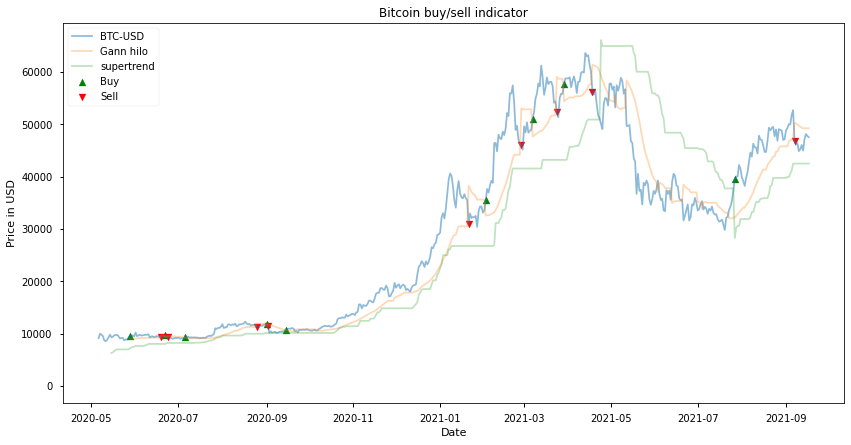

In [71]:
# Wederom plotten van de resultaten voor controle
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn-notebook')
plt.figure(figsize=(14,7))

date = df['# openTime']

plt.plot(date, df['close'], label='BTC-USD', alpha=0.5)
plt.plot(date, df['hilo'], label='Gann hilo', alpha=0.3)
plt.plot(date, df['supertrend'], label='supertrend', alpha=0.3)


# Plot de output van buy signal en sell signal
plt.scatter(date, df['Buy_signal_price'], label='Buy', marker='^', color='green')
plt.scatter(date, df['Sell_signal_price'], label='Sell', marker='v', color='red')

plt.title('Bitcoin buy/sell indicator')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend(loc='upper left')
plt.show()

In [75]:
# plot of the last 30 days
month = pd.DataFrame()
month = df.tail(50)
month

,# openTime,open,high,low,close,volume,closeTime,qouteAssetVolume,numberOfTrades,takerBuyBaseAssetVolume,...,hilo_buy,supertrend_buy,supertrend,macd,macds,macdh,Buy_signal_price,Sell_signal_price,macd_buy,signal
450,2021-07-30,40018.49,42316.71,38313.23,42206.37,73602.784805,2021-07-30 23:59:59.999,2.939834e+09,1797012,37730.426862,...,True,1,30574.001914,1600.102243,424.671178,1175.431065,NaN,NaN,True,neutral
451,2021-07-31,42206.36,42448.00,41000.15,41461.83,44849.791012,2021-07-31 23:59:59.999,1.868286e+09,1565380,22844.245050,...,True,1,31880.874651,1833.936464,706.524235,1127.412229,NaN,NaN,True,neutral
452,2021-08-01,41461.84,42599.00,39422.01,39845.44,53953.186326,2021-08-01 23:59:59.999,2.227567e+09,1603964,25796.753795,...,True,1,31880.874651,1867.297562,938.678901,928.618661,NaN,NaN,True,neutral
453,2021-08-02,39850.27,40480.01,38690.00,39147.82,50837.351954,2021-08-02 23:59:59.999,2.010928e+09,1162878,24558.005343,...,True,1,31880.874651,1816.504831,1114.244087,702.260744,NaN,NaN,True,neutral
454,2021-08-03,39146.86,39780.00,37642.03,38207.05,57117.435853,2021-08-03 23:59:59.999,2.195361e+09,1379871,27683.466598,...,True,1,31880.874651,1680.961867,1227.587643,453.374224,NaN,NaN,True,neutral
455,2021-08-04,38207.04,39969.66,37508.56,39723.18,52329.352430,2021-08-04 23:59:59.999,2.028793e+09,1220555,26804.211169,...,True,1,31880.874651,1676.555820,1317.381278,359.174542,NaN,NaN,True,neutral
456,2021-08-05,39723.17,41350.00,37332.70,40862.46,84343.755621,2021-08-05 23:59:59.999,3.314528e+09,1913281,41673.129081,...,True,1,31880.874651,1744.880474,1402.881117,341.999357,NaN,NaN,True,neutral
457,2021-08-06,40862.46,43392.43,39853.86,42836.87,75753.941347,2021-08-06 23:59:59.999,3.148022e+09,2223356,38278.004758,...,True,1,31880.874651,1936.029301,1509.510754,426.518547,NaN,NaN,True,neutral
458,2021-08-07,42836.87,44700.00,42446.41,44572.54,73396.740808,2021-08-07 23:59:59.999,3.197407e+09,2258213,37355.623845,...,True,1,32279.687193,2202.184771,1648.045558,554.139214,NaN,NaN,True,neutral
459,2021-08-08,44572.54,45310.00,43261.00,43794.37,69329.092698,2021-08-08 23:59:59.999,3.074925e+09,1857112,34099.150660,...,True,1,33199.283973,2323.538775,1783.144201,540.394574,NaN,NaN,True,neutral


ConversionError: Failed to convert value(s) to axis units: array(['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'sell', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral'], dtype=object)

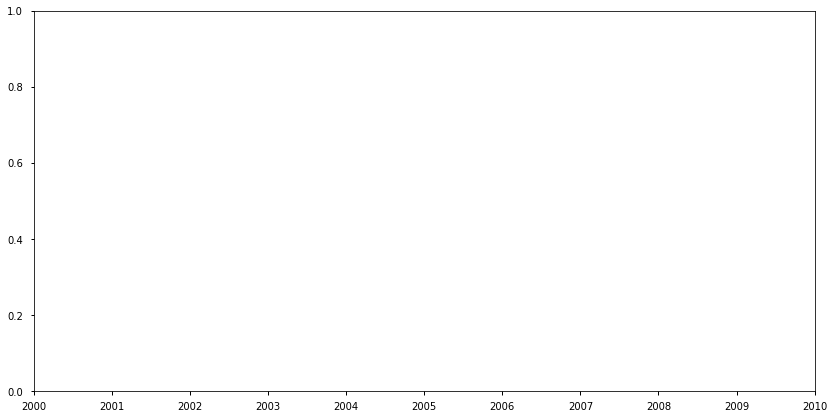

In [76]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn-notebook')
plt.figure(figsize=(14,7))

date = month['# openTime']

plt.plot(month, month['close'], label='BTC-USD', alpha=0.5)
plt.plot(month, month['hilo'], label='Gann hilo', alpha=0.3)
plt.plot(month, month['supertrend'], label='supertrend', alpha=0.3)


# Plot de output van buy signal en sell signal
plt.scatter(month, month['Buy_signal_price'], label='Buy', marker='^', color='green')
plt.scatter(month, month['Sell_signal_price'], label='Sell', marker='v', color='red')

plt.title('Bitcoin buy/sell indicator')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend(loc='upper left')
plt.show()

## Verbetering van signalering MACD sell crossover werkt niet in oorspronkelijke script

In [94]:
# Create a function to signal when buy/sell signals arise
def buy_sell(df):
  sigPriceBuy = []
  sigPriceSell = []
  signal = []
  flag = -1

  for i in range(len(df)):
    if (df['hilo_buy'][i] == True) & (df['macd_buy'][i] == True) & (df['supertrend_buy'][i] == 1):
      if flag != 1:
        sigPriceBuy.append(df['close'][i])
        sigPriceSell.append(np.NaN)
        signal.append('buy')
        flag = 1
      else:
        sigPriceBuy.append(np.NaN)
        sigPriceSell.append(np.NaN)
        signal.append('neutral')
    elif ((df['hilo_buy'][i] == True) & (df['macd_buy'][i] == False)) | ((df['hilo_buy'][i] == False) & (df['macd_buy'][i] == False)):
      if flag != 0:
        sigPriceBuy.append(np.NaN)
        sigPriceSell.append(df['close'][i])
        signal.append('sell')
        flag = 0
      else:
        sigPriceBuy.append(np.NaN)
        sigPriceSell.append(np.NaN)
        signal.append('neutral')
    else:
      sigPriceBuy.append(np.NaN)
      sigPriceSell.append(np.NaN)
      signal.append('neutral')

  return(sigPriceBuy, sigPriceSell,signal)

buy_sell = buy_sell(df)
df['Buy_signal_price'] = buy_sell[0]
df['Sell_signal_price'] = buy_sell[1]
df['signal'] = buy_sell[2]

df[['closeTime','close','macd_buy','hilo_buy','supertrend_buy','signal','Buy_signal_price','Sell_signal_price']].tail(60)



,closeTime,close,macd_buy,hilo_buy,supertrend_buy,signal,Buy_signal_price,Sell_signal_price
440,2021-07-20 23:59:59.999,29790.35,False,False,-1,neutral,NaN,NaN
441,2021-07-21 23:59:59.999,32144.51,False,False,-1,neutral,NaN,NaN
442,2021-07-22 23:59:59.999,32287.83,True,False,-1,neutral,NaN,NaN
443,2021-07-23 23:59:59.999,33634.09,True,True,-1,neutral,NaN,NaN
444,2021-07-24 23:59:59.999,34258.14,True,True,-1,neutral,NaN,NaN
445,2021-07-25 23:59:59.999,35381.02,True,True,-1,neutral,NaN,NaN
446,2021-07-26 23:59:59.999,37237.60,True,True,-1,neutral,NaN,NaN
447,2021-07-27 23:59:59.999,39457.87,True,True,1,buy,39457.87,NaN
448,2021-07-28 23:59:59.999,40019.56,True,True,1,neutral,NaN,NaN
449,2021-07-29 23:59:59.999,40016.48,True,True,1,neutral,NaN,NaN


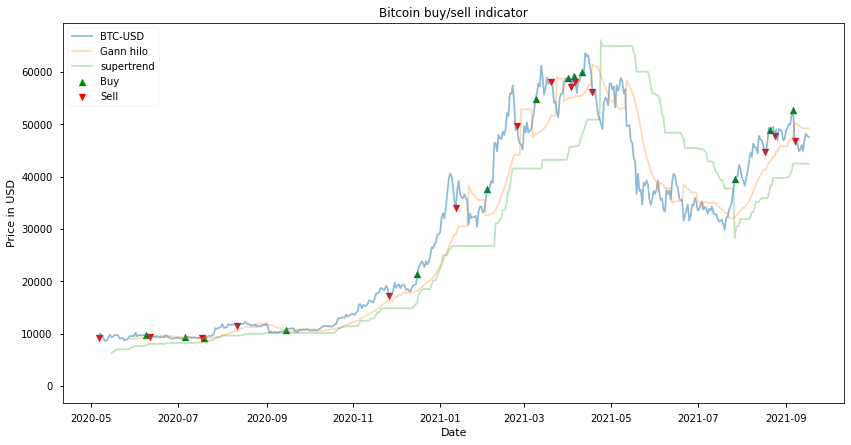

In [95]:
# Wederom plotten van de resultaten voor controle
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn-notebook')
plt.figure(figsize=(14,7))

date = df['# openTime']

plt.plot(date, df['close'], label='BTC-USD', alpha=0.5)
plt.plot(date, df['hilo'], label='Gann hilo', alpha=0.3)
plt.plot(date, df['supertrend'], label='supertrend', alpha=0.3)


# Plot de output van buy signal en sell signal
plt.scatter(date, df['Buy_signal_price'], label='Buy', marker='^', color='green')
plt.scatter(date, df['Sell_signal_price'], label='Sell', marker='v', color='red')

plt.title('Bitcoin buy/sell indicator')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend(loc='upper left')
plt.show()